In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
import logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('studytrack_preprocessing.log'),
        logging.StreamHandler()
    ])

In [ ]:
try:
    df = pd.read_csv('/content/enhanced_student_habits_performance_dataset.csv')
    logging.info(f"Dataset loaded successfully! Shape: {df.shape}")
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    logging.error("Dataset file not found!")
    raise
except Exception as e:
    logging.error(f"Error loading dataset: {str(e)}")
    raise

Dataset loaded successfully!
Shape: (80000, 31)


In [ ]:
print("Dataset Info:")
print(df.info())
print("Missing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12  parental_education_level       8

In [ ]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,semester,stress_level,social_activity,screen_time,parental_support_level,motivation_level,exam_anxiety_score,time_management_score,exam_score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,139999.500000,22.004288,4.174388,2.501366,1.997754,69.967884,7.017417,3.516587,6.804107,3.602448,4.497338,5.012478,2.500225,9.673029,5.479438,5.488525,8.508475,5.499132,89.141350
std,23094.155105,3.745570,2.004135,1.445441,1.155992,17.333015,1.467377,2.291575,1.921579,0.462876,2.295312,1.953174,1.704292,2.780869,2.873327,2.867782,1.796411,2.603534,11.591497
min,100000.000000,16.000000,0.000000,0.000000,0.000000,40.000000,4.000000,0.000000,1.000000,1.640000,1.000000,1.000000,0.000000,0.300000,1.000000,1.000000,5.000000,1.000000,36.000000
25%,119999.750000,19.000000,2.800000,1.200000,1.000000,55.000000,6.000000,2.000000,5.500000,3.270000,2.000000,3.600000,1.000000,7.800000,3.000000,3.000000,7.000000,3.200000,82.000000
50%,139999.500000,22.000000,4.125624,2.500000,2.000000,69.900000,7.000000,4.000000,6.900000,3.790000,5.000000,5.000000,2.000000,9.700000,5.000000,5.000000,10.000000,5.500000,93.000000
75%,159999.250000,25.000000,5.500000,3.800000,3.000000,84.900000,8.000000,6.000000,8.200000,4.000000,7.000000,6.400000,4.000000,11.600000,8.000000,8.000000,10.000000,7.800000,100.000000
max,179999.000000,28.000000,12.000000,5.000000,4.000000,100.000000,12.000000,7.000000,10.000000,4.000000,8.000000,10.000000,5.000000,21.000000,10.000000,10.000000,10.000000,10.000000,100.000000


In [ ]:
# Outlier Detection and Handling
def remove_outliers(df, columns):
    df_clean = df.copy()
    outlier_counts = {}
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers before clipping
        outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
        outlier_counts[col] = outliers

        # Clip outliers
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)

    print("\nOutliers detected and handled:")
    for col, count in outlier_counts.items():
        print(f"  {col}: {count} outliers")

    return df_clean

numeric_features_to_clean = ['study_hours_per_day', 'social_media_hours',
                             'netflix_hours', 'screen_time', 'sleep_hours']
df = remove_outliers(df, numeric_features_to_clean)
print(f"Dataset shape after outlier handling: {df.shape}")


Outliers detected and handled:
  study_hours_per_day: 346 outliers
  social_media_hours: 0 outliers
  netflix_hours: 0 outliers
  screen_time: 356 outliers
  sleep_hours: 284 outliers
Dataset shape after outlier handling: (80000, 31)


In [ ]:
print("\nCreating Engineered Features...")

# Interaction and derived features
df['study_to_social_ratio'] = df['study_hours_per_day'] / (df['social_media_hours'] + 1)
df['work_life_balance'] = df['study_hours_per_day'] + df['sleep_hours'] + df['exercise_frequency']
df['academic_engagement'] = df['attendance_percentage'] * df['time_management_score'] / 100
df['stress_support_ratio'] = df['stress_level'] / (df['parental_support_level'] + 1)
df['total_distractions'] = df['social_media_hours'] + df['netflix_hours']
df['sleep_deficit'] = 8 - df['sleep_hours']  # Assuming 8 hours is ideal
df['study_efficiency'] = df['study_hours_per_day'] * df['time_management_score']

print(f"Created 7 engineered features")
print(f"New shape: {df.shape}")


Creating Engineered Features...
Created 7 engineered features
New shape: (80000, 38)



Generating Correlation Analysis...


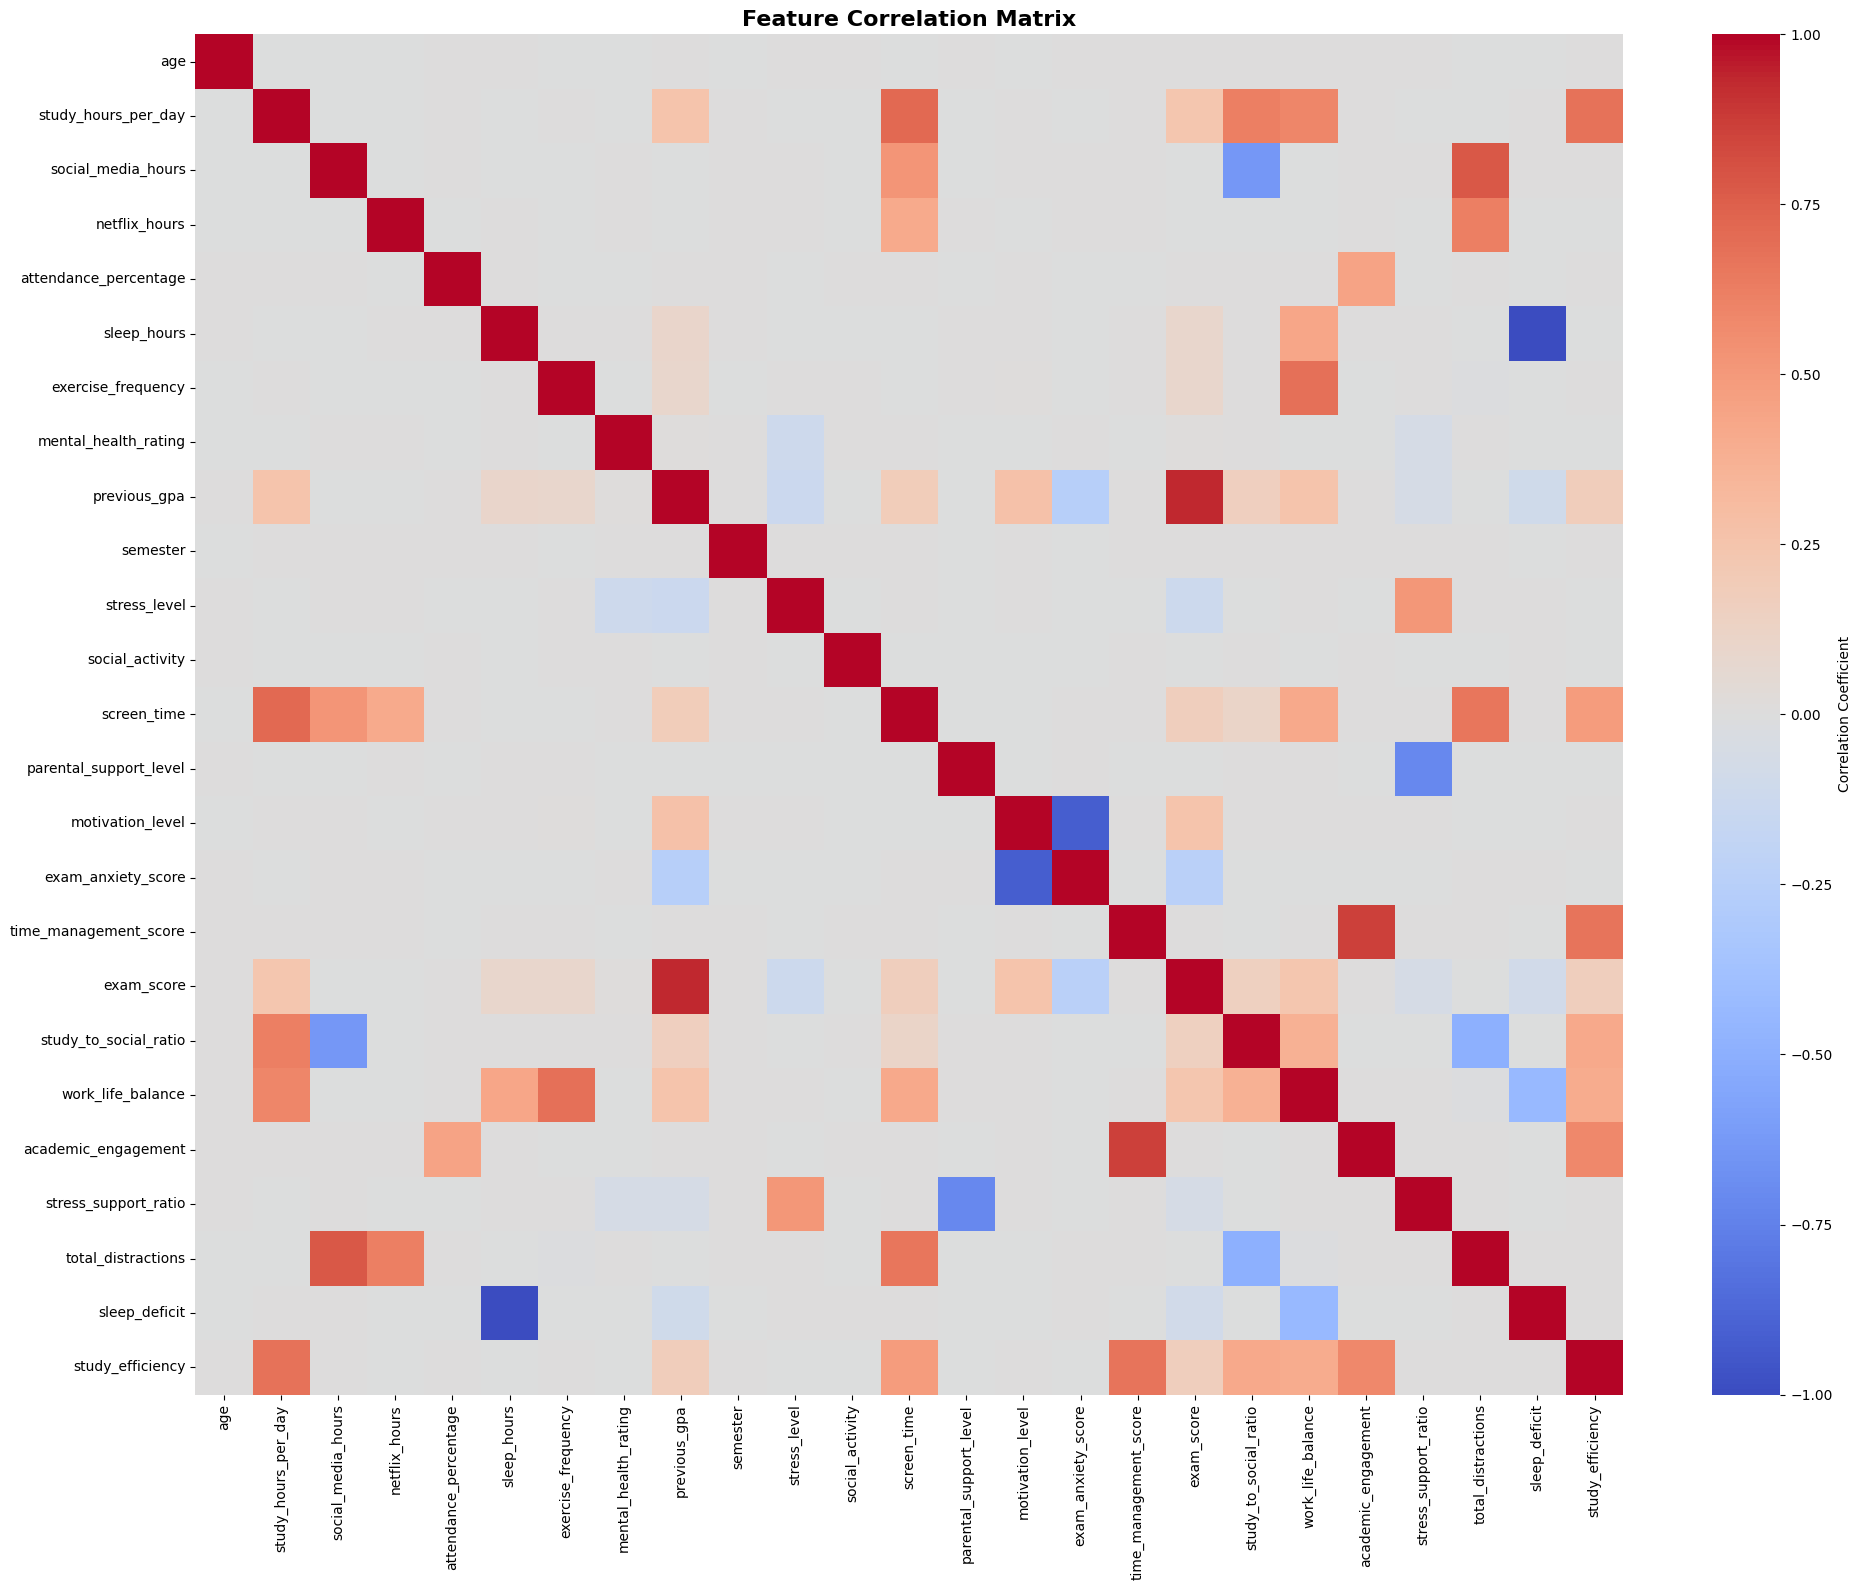

Saved: correlation_matrix.png


In [ ]:
print("\nGenerating Correlation Analysis...")
plt.figure(figsize=(20, 16))
numeric_cols = df.select_dtypes(include=[np.number]).columns
# Remove student_id from correlation
numeric_cols = [col for col in numeric_cols if col != 'student_id']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: correlation_matrix.png")

Creating Habit Clusters (Behavioral Patterns)...

Determining optimal number of clusters...


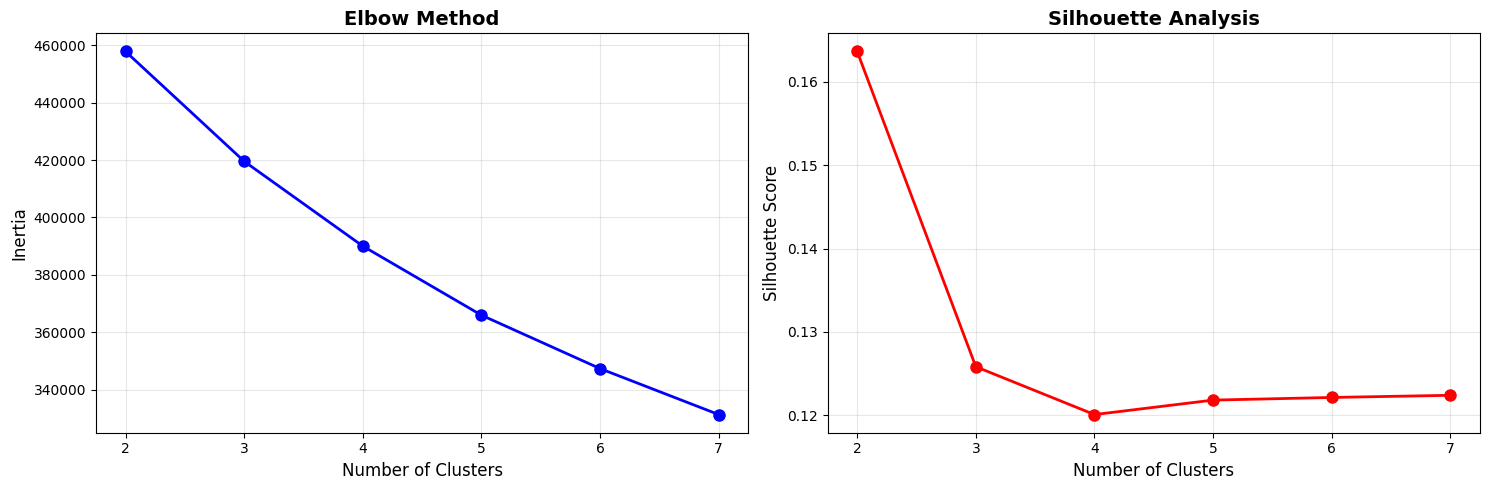

Saved: optimal_clusters_analysis.png

Using k=3 clusters based on elbow and silhouette analysis
Created habit clusters based on behavioral patterns only

Cluster Distribution:
habit_cluster
0    26724
1    29442
2    23834
Name: count, dtype: int64

Cluster Characteristics:
               study_hours_per_day  social_media_hours  netflix_hours  \
habit_cluster                                                           
0                         5.951582            2.857432       2.635294   
1                         3.332521            1.166595       1.755387   
2                         3.212436            3.750961       1.582303   

               attendance_percentage  sleep_hours  screen_time  \
habit_cluster                                                    
0                          70.216446     7.027009    12.511574   
1                          69.811701     7.013586     7.205244   
2                          69.882114     7.006080     9.533352   

               time_manageme

In [ ]:
print("Creating Habit Clusters (Behavioral Patterns)...")

clustering_features = [
    'study_hours_per_day',
    'social_media_hours',
    'netflix_hours',
    'attendance_percentage',
    'sleep_hours',
    'screen_time',
    'time_management_score'
]

missing_features = [f for f in clustering_features if f not in df.columns]
if missing_features:
    print(f"Missing features: {missing_features}")
    clustering_features = [f for f in clustering_features if f in df.columns]
    print(f"Using available features: {clustering_features}")

X_cluster = df[clustering_features].copy()

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Determine optimal number of clusters using Elbow Method and Silhouette Analysis
print("\nDetermining optimal number of clusters...")
inertias = []
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_temp.fit_predict(X_cluster_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, labels))

# Visualize both metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters', fontsize=12)
ax1.set_ylabel('Inertia', fontsize=12)
ax1.set_title('Elbow Method', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('optimal_clusters_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: optimal_clusters_analysis.png")

# Use the optimal number (choose based on elbow + silhouette)
# For now, using 3 as default, but review the plots
optimal_k = 3
print(f"\nUsing k={optimal_k} clusters based on elbow and silhouette analysis")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['habit_cluster'] = kmeans.fit_predict(X_cluster_scaled)

print(f"Created habit clusters based on behavioral patterns only")
print(f"\nCluster Distribution:")
print(df['habit_cluster'].value_counts().sort_index())

print("\nCluster Characteristics:")
cluster_summary = df.groupby('habit_cluster')[clustering_features].mean()
print(cluster_summary)

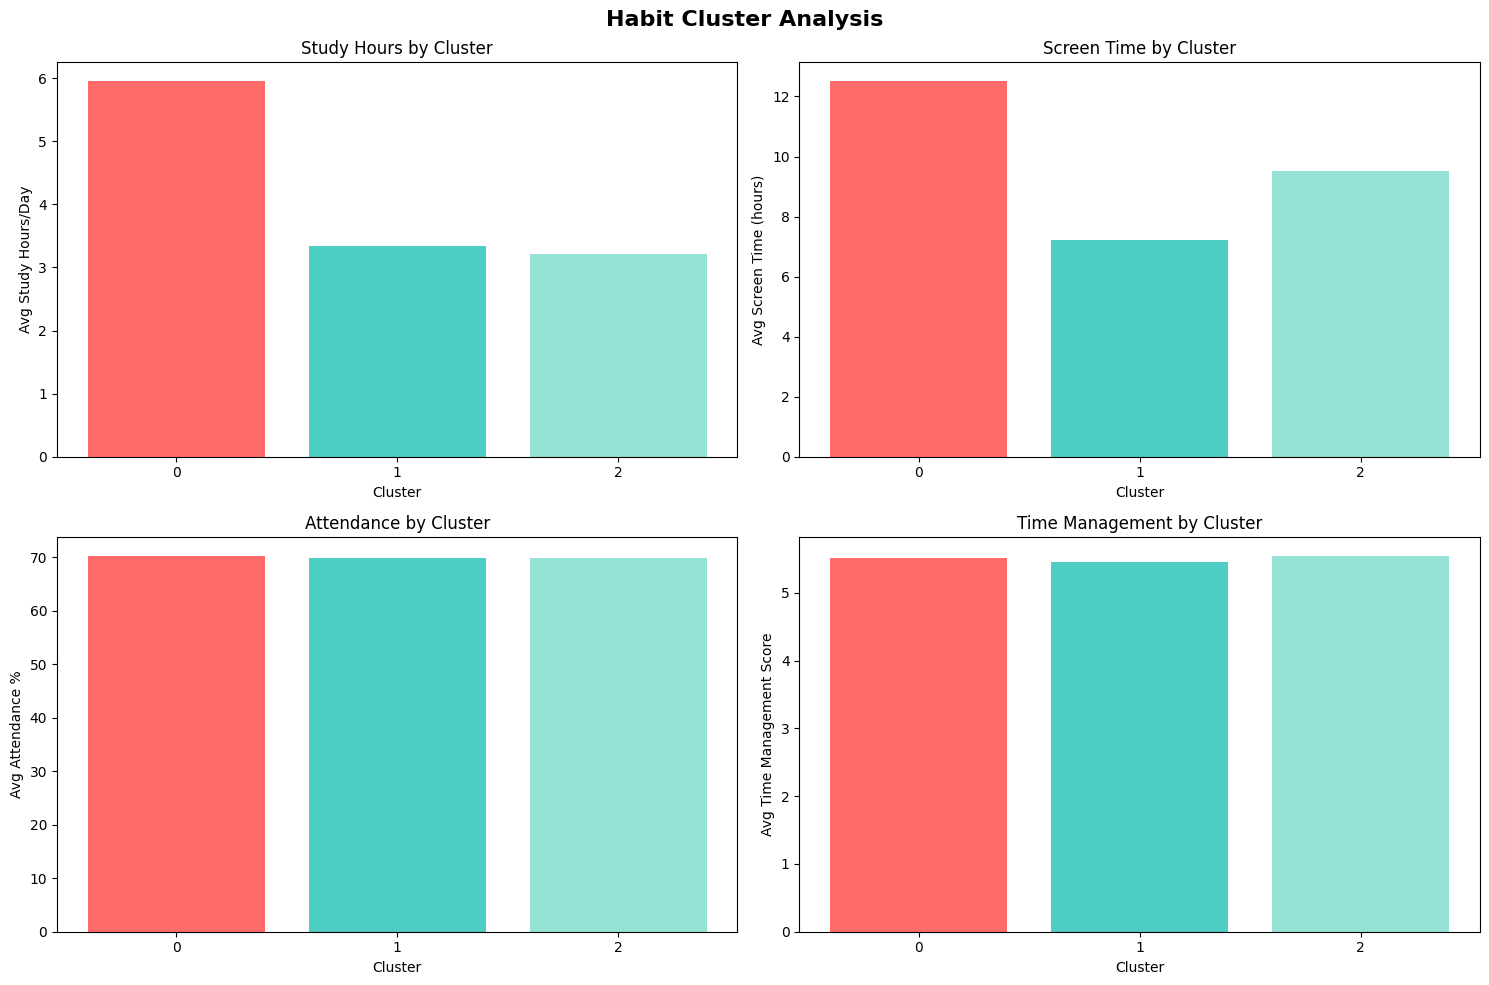

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Habit Cluster Analysis', fontsize=16, fontweight='bold')

axes[0, 0].bar(cluster_summary.index, cluster_summary['study_hours_per_day'],
               color=['#ff6b6b', '#4ecdc4', '#95e1d3'])
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Avg Study Hours/Day')
axes[0, 0].set_title('Study Hours by Cluster')
axes[0, 0].set_xticks([0, 1, 2])

if 'screen_time' in clustering_features:
    axes[0, 1].bar(cluster_summary.index, cluster_summary['screen_time'],
                   color=['#ff6b6b', '#4ecdc4', '#95e1d3'])
    axes[0, 1].set_xlabel('Cluster')
    axes[0, 1].set_ylabel('Avg Screen Time (hours)')
    axes[0, 1].set_title('Screen Time by Cluster')
    axes[0, 1].set_xticks([0, 1, 2])

axes[1, 0].bar(cluster_summary.index, cluster_summary['attendance_percentage'],
               color=['#ff6b6b', '#4ecdc4', '#95e1d3'])
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Avg Attendance %')
axes[1, 0].set_title('Attendance by Cluster')
axes[1, 0].set_xticks([0, 1, 2])

if 'time_management_score' in clustering_features:
    axes[1, 1].bar(cluster_summary.index, cluster_summary['time_management_score'],
                   color=['#ff6b6b', '#4ecdc4', '#95e1d3'])
    axes[1, 1].set_xlabel('Cluster')
    axes[1, 1].set_ylabel('Avg Time Management Score')
    axes[1, 1].set_title('Time Management by Cluster')
    axes[1, 1].set_xticks([0, 1, 2])

plt.tight_layout()
plt.savefig('habit_clusters_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


Generating feature distributions by dropout risk...


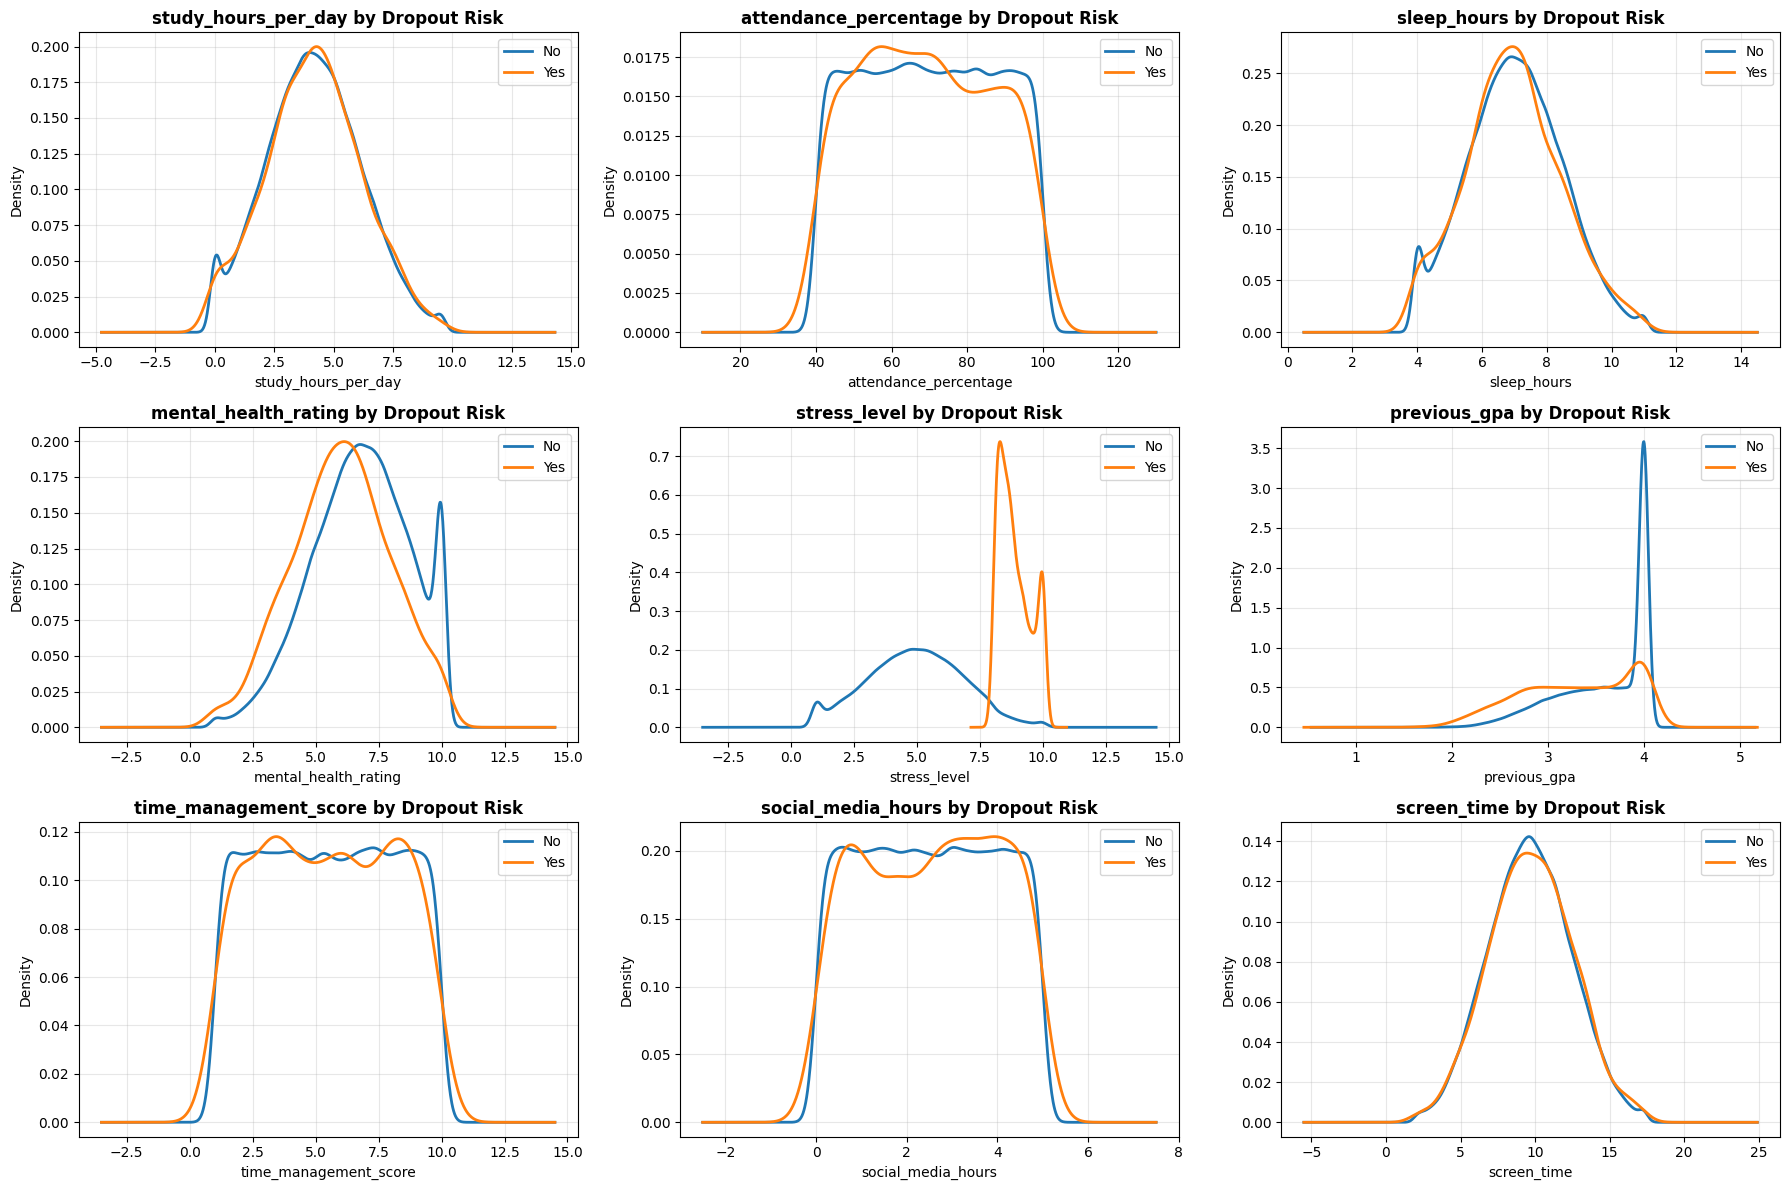

Saved: feature_distributions_by_risk.png


In [ ]:
# Feature distributions by dropout risk
print("\nGenerating feature distributions by dropout risk...")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
key_features = ['study_hours_per_day', 'attendance_percentage', 'sleep_hours',
                'mental_health_rating', 'stress_level', 'previous_gpa',
                'time_management_score', 'social_media_hours', 'screen_time']

for idx, feature in enumerate(key_features):
    ax = axes[idx // 3, idx % 3]
    for risk_level in df['dropout_risk'].unique():
        subset = df[df['dropout_risk'] == risk_level]
        subset[feature].plot(kind='kde', ax=ax, label=risk_level, linewidth=2)
    ax.set_title(f'{feature} by Dropout Risk', fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('feature_distributions_by_risk.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: feature_distributions_by_risk.png")

In [ ]:
print("Creating Dropout Risk Labels.")

def calculate_dropout_risk(row):
    risk_score = 0

    if 'exam_score' in df.columns and row['exam_score'] < 60:
        risk_score += 3
    if 'previous_gpa' in df.columns and row['previous_gpa'] < 2.5:
        risk_score += 2

    if row['attendance_percentage'] < 70:
        risk_score += 2

    if row['study_hours_per_day'] < 3:
        risk_score += 1

    if 'mental_health_rating' in df.columns and row['mental_health_rating'] < 5:
        risk_score += 1
    if 'stress_level' in df.columns and row['stress_level'] > 7:
        risk_score += 1

    if 'time_management_score' in df.columns and row['time_management_score'] < 4:
        risk_score += 1

    if 'motivation_level' in df.columns and row['motivation_level'] < 4:
        risk_score += 1

    if 'screen_time' in df.columns and row['screen_time'] > 8:
        risk_score += 1

    return 'Yes' if risk_score >= 5 else 'No'

df['dropout_risk'] = df.apply(calculate_dropout_risk, axis=1)

print(f"Created dropout_risk labels")
print(f"\nDropout Risk Distribution:")
print(df['dropout_risk'].value_counts())
print(f"\nDropout Rate: {(df['dropout_risk'] == 'Yes').sum() / len(df) * 100:.2f}%")

Creating Dropout Risk Labels.
Created dropout_risk labels

Dropout Risk Distribution:
dropout_risk
No     67723
Yes    12277
Name: count, dtype: int64

Dropout Rate: 15.35%


In [ ]:
print("\nEncoding Categorical Variables.")

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'dropout_risk' in categorical_cols:
    categorical_cols.remove('dropout_risk')

print(f"Categorical columns to encode: {categorical_cols}")

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

print(f"Encoded {len(categorical_cols)} categorical columns")
print(f"New shape: {df_encoded.shape}")


Encoding Categorical Variables.
Categorical columns to encode: ['gender', 'major', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation', 'study_environment', 'access_to_tutoring', 'family_income_range', 'learning_style']
Encoded 11 categorical columns
New shape: (80000, 55)


In [ ]:
print("FINAL PREPROCESSED DATASET")
print(f"Shape: {df_encoded.shape}")
print(f"Columns: {df_encoded.columns.tolist()}")
print(f"\nData types:")
print(df_encoded.dtypes.value_counts())
print(f"\nMissing values: {df_encoded.isnull().sum().sum()}")
print(f"\nFirst few rows:")
df_encoded.head()

FINAL PREPROCESSED DATASET
Shape: (80000, 55)
Columns: ['student_id', 'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'previous_gpa', 'semester', 'stress_level', 'dropout_risk', 'social_activity', 'screen_time', 'parental_support_level', 'motivation_level', 'exam_anxiety_score', 'time_management_score', 'exam_score', 'study_to_social_ratio', 'work_life_balance', 'academic_engagement', 'stress_support_ratio', 'total_distractions', 'sleep_deficit', 'study_efficiency', 'habit_cluster', 'gender_Male', 'gender_Other', 'major_Biology', 'major_Business', 'major_Computer Science', 'major_Engineering', 'major_Psychology', 'part_time_job_Yes', 'diet_quality_Good', 'diet_quality_Poor', 'parental_education_level_High School', 'parental_education_level_Master', 'parental_education_level_PhD', 'parental_education_level_Some College', 'internet_quality_Low', 'internet_quality_Medium', 'extracurr

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,...,study_environment_Co-Learning Group,study_environment_Dorm,study_environment_Library,study_environment_Quiet Room,access_to_tutoring_Yes,family_income_range_Low,family_income_range_Medium,learning_style_Kinesthetic,learning_style_Reading,learning_style_Visual
0,100000,26,7.645367,3.0,0.1,70.3,6.2,3,6.0,4.00,...,1,0,0,0,1,0,0,0,1,0
1,100001,28,5.700000,0.5,0.4,88.4,7.2,4,6.8,4.00,...,1,0,0,0,1,1,0,0,1,0
2,100002,17,2.400000,4.2,0.7,82.1,9.2,4,5.7,3.79,...,0,0,1,0,1,0,0,1,0,0
3,100003,27,3.400000,4.6,2.3,79.3,4.2,3,8.5,4.00,...,1,0,0,0,1,1,0,0,1,0
4,100004,25,4.700000,0.8,2.7,62.9,6.5,6,9.2,4.00,...,0,0,0,1,1,0,1,0,1,0


In [ ]:
output_filename = 'student_study_hours_preprocessed.csv'
df_encoded.to_csv(output_filename, index=False)

print(f"\nSaved preprocessed data: {output_filename}")


Saved preprocessed data: student_study_hours_preprocessed.csv


In [ ]:
# Save clustering artifacts
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')
print(f"\nSaved scaler.pkl and kmeans_model.pkl")

logging.info("Preprocessing completed successfully!")
print("PREPROCESSING COMPLETE!")


Saved scaler.pkl and kmeans_model.pkl
PREPROCESSING COMPLETE!
